<a href="https://colab.research.google.com/github/ambitama-poddar/Machine-Learning-Practicals/blob/main/DA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Design Multiple Linear Regressions (MLR) for estimate the Mileage per gallon (MPG) using Auto-MPG dataset.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
# Load and read the dataset from CSV file
data = pd.read_csv("auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
#Statistical Details of the dataset
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
# Remove the 'car name' feature
data = data.drop('car name', axis=1)

In [5]:
columns_to_use = data.columns
print(columns_to_use)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')


In [6]:
cdf = data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
cdf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


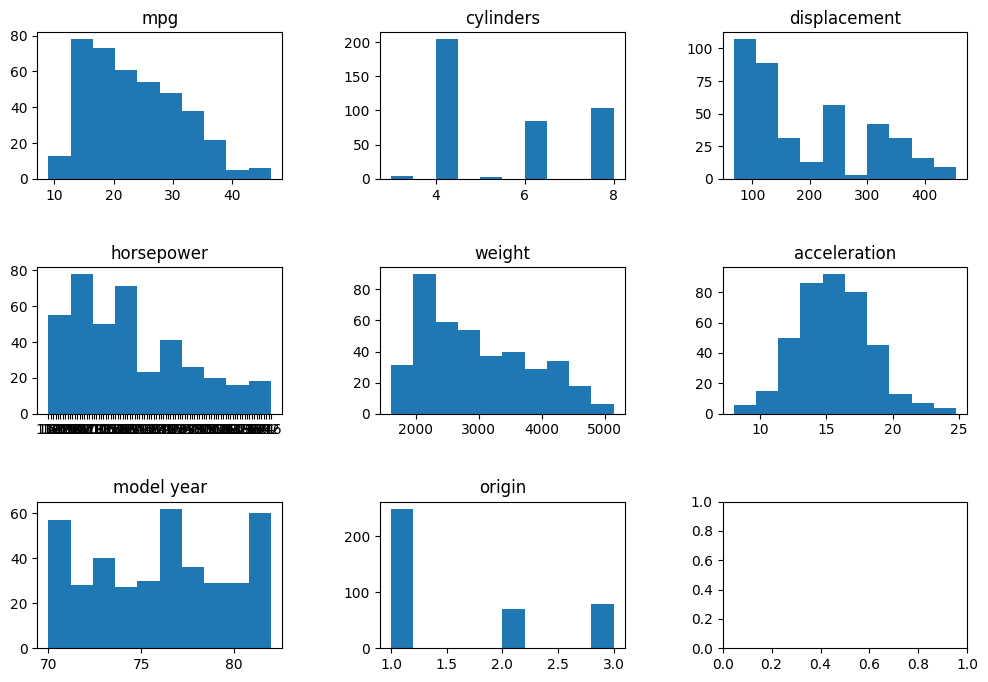

In [7]:
viz = cdf[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
# Create subplots for each column
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(viz.columns):
    axes[i].hist(viz[column], bins=10)
    axes[i].set_title(column)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Display the plots
plt.show()

In [8]:
# Split the data into training and testing sets
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [9]:
regr_m = linear_model.LinearRegression()
train_x = np.asanyarray(train[['mpg', 'cylinders']])
train_y = np.asanyarray(train[['weight']])
regr_m.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr_m.coef_)
print ('Intercept: ',regr_m.intercept_)

Coefficients:  [[-36.06973266 318.46956207]]
Intercept:  [2067.7015376]


In [10]:
test_x = np.asanyarray(test[['mpg', 'cylinders']])
test_y = np.asanyarray(test[['weight']])
test_y_ = regr_m.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 288.87
Residual sum of squares (MSE): 123005.68
R2-score: 0.82


# 2. Compare the classification performance of the standard machine learning techniques using penguin species dataset.

In [11]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import SimpleImputer
%matplotlib inline

In [12]:
# Load and read the dataset from CSV file
df = pd.read_csv("penguins_lter.csv")
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [14]:
columns_to_use = df.columns
print(columns_to_use)

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')


In [15]:
df.drop("Sample Number", axis=1, inplace = True)

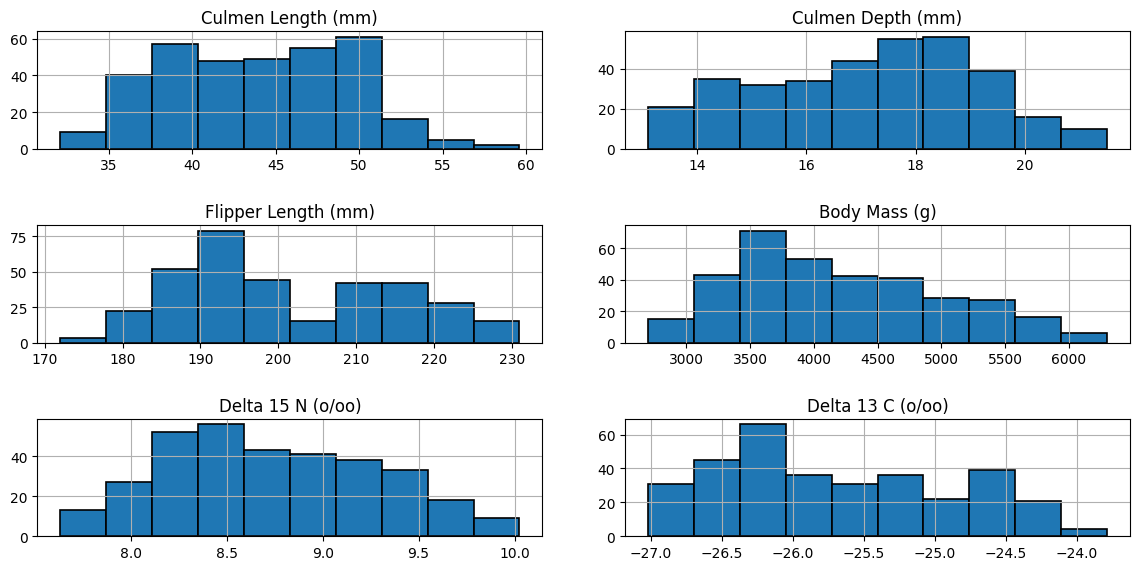

In [16]:
# Create histograms for each column
df.hist(edgecolor='black', linewidth=1.2)
plt.tight_layout()

# Set the size of the figure
plt.gcf().set_size_inches(12, 6)

# Display the plots
plt.show()


<ipython-input-17-e3c5221626e6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr()


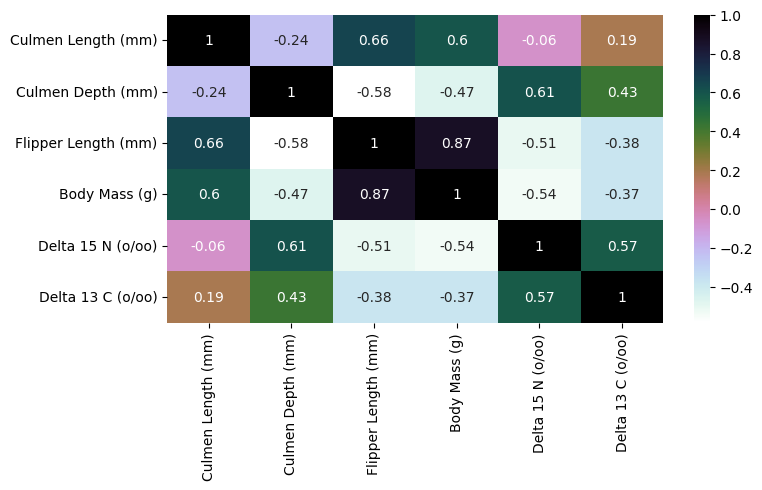

In [17]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr()
plt.show()

In [18]:
train, test = train_test_split(df, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(240, 16)
(104, 16)


In [19]:
train_x = train[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']] # taking the training data features
train_y = train.Species # output of the training data

test_x = test[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']] # taking test data feature
test_y = test.Species # output value of the test data

In [20]:
# Preprocess the training and test data to handle missing values
imputer = SimpleImputer(strategy='mean')
train_x = imputer.fit_transform(train_x)
test_x = imputer.transform(test_x)

In [21]:
# Convert the NumPy array back to a DataFrame
train_x= pd.DataFrame(train_x, columns=['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'])
test_x=pd.DataFrame(test_x, columns=['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'])

In [22]:
train_x.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,39.7,18.9,184.0,3550.0,8.85699,-25.80208
1,49.5,19.0,200.0,3800.0,9.63074,-24.34684
2,34.4,18.4,184.0,3325.0,8.47827,-25.23319
3,49.9,16.1,213.0,5400.0,8.36390,-26.15531
4,41.4,18.5,202.0,3875.0,9.59462,-25.42621


In [23]:
train_y.head()

105          Adelie Penguin (Pygoscelis adeliae)
179    Chinstrap penguin (Pygoscelis antarctica)
18           Adelie Penguin (Pygoscelis adeliae)
343            Gentoo penguin (Pygoscelis papua)
123          Adelie Penguin (Pygoscelis adeliae)
Name: Species, dtype: object

In [24]:
test_x.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,41.1,19.0,182.0,3425.0,8.746565,-25.654725
1,49.1,14.8,220.0,5150.0,7.897440,-26.634050
2,46.2,14.9,221.0,5300.0,8.600920,-26.843740
3,50.0,19.5,196.0,3900.0,8.920690,-24.235920
4,36.2,16.1,187.0,3550.0,7.823810,-26.513820


In [25]:
test_y.head()

46           Adelie Penguin (Pygoscelis adeliae)
254            Gentoo penguin (Pygoscelis papua)
281            Gentoo penguin (Pygoscelis papua)
153    Chinstrap penguin (Pygoscelis antarctica)
78           Adelie Penguin (Pygoscelis adeliae)
Name: Species, dtype: object

In [26]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm

# Create and train the Logistic Regression model
model1 = LogisticRegression(random_state=0, max_iter=1000)

# we train the algorithm with training data and training output
model1.fit(train_x, train_y)

# Make predictions on the test data
prediction1 = model1.predict(test_x)

# Calculate and print the accuracy of the model
accuracy = metrics.accuracy_score(prediction1, test_y)
print('The accuracy of the Logistic Regression is:', accuracy)

The accuracy of the Logistic Regression is: 0.9903846153846154


In [27]:
from sklearn.tree import DecisionTreeClassifier # for using DTA

# Create and train the Decision Tree Classifier model
model2 = DecisionTreeClassifier()

# we train the algorithm with training data and training output
model2.fit(train_x, train_y)

# Make predictions on the test data
prediction2 = model2.predict(test_x)

# Calculate and print the accuracy of the model
print('The accuracy of the Decision Tree Classifier is: ', metrics.accuracy_score(prediction2, test_y))

The accuracy of the Decision Tree Classifier is:  0.9615384615384616


In [28]:
from sklearn.neighbors import KNeighborsClassifier # KNN classifier

# Create and train the Decision Tree Classifier model
model3 = KNeighborsClassifier()

# we train the algorithm with training data and training output
model3.fit(train_x, train_y)

# Make predictions on the test data
prediction3 = model3.predict(test_x)

# Calculate and print the accuracy of the model
print('The accuracy of the K-Neighbors Classifier is: ', metrics.accuracy_score(prediction3, test_y))

The accuracy of the K-Neighbors Classifier is:  0.8269230769230769


In [29]:
from sklearn import svm # for suport vector machine algorithm

# Create and train the Support Vector Machine model
model4 = svm.SVC(kernel='linear') # selected svm algorithm is 'linear'

# we train the algorithm with training data and training output
model4.fit(train_x, train_y)

# Make predictions on the test data
prediction4 = model4.predict(test_x)

# Calculate and print the accuracy of the model
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction4, test_y))

The accuracy of the SVM is:  1.0


In [30]:
# Create and train the Support Vector Machine model
model5 = svm.SVC(kernel='poly') # selected svm algorithm is 'poly'

# we train the algorithm with training data and training output
model5.fit(train_x, train_y)

# Make predictions on the test data
prediction5 = model5.predict(test_x)

# Calculate and print the accuracy of the model
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction5, test_y))

The accuracy of the SVM is:  0.7596153846153846


In [31]:
# Create and train the Support Vector Machine model
model6 = svm.SVC(kernel='rbf') # selected svm algorithm is 'rbf'

# we train the algorithm with training data and training output
model6.fit(train_x, train_y)

# Make predictions on the test data
prediction6 = model6.predict(test_x)

# Calculate and print the accuracy of the model
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction6, test_y))

The accuracy of the SVM is:  0.7596153846153846


In [32]:
# Create and train the Support Vector Machine model
model7 = svm.SVC(kernel='sigmoid') # selected svm algorithm is 'sigmoid'

# we train the algorithm with training data and training output
model7.fit(train_x, train_y)

# Make predictions on the test data
prediction7 = model7.predict(test_x)

# Calculate and print the accuracy of the model
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction7, test_y))

The accuracy of the SVM is:  0.19230769230769232


In [36]:
from sklearn.metrics.pairwise import pairwise_kernels

# Compute the kernel matrix using the desired kernel function
kernel_matrix_train = pairwise_kernels(train_x, metric='linear')

# Create and train the SVM model with the precomputed kernel
model8 = svm.SVC(kernel='precomputed')
model8.fit(kernel_matrix_train, train_y)

# Compute the kernel matrix for the test data
kernel_matrix_test = pairwise_kernels(test_x, train_x, metric='linear')

# Make predictions on the test data using the precomputed kernel
prediction8 = model8.predict(kernel_matrix_test)

# Calculate and print the accuracy of the model
accuracy = metrics.accuracy_score(prediction8, test_y)
print('The accuracy of the SVM with precomputed kernel is:', accuracy)


The accuracy of the SVM with precomputed kernel is: 1.0
